In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

In [3]:
from sklearn.feature_selection import mutual_info_classif   # Used as/for feacture selection
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
table = pd.DataFrame(data.data,columns=data.feature_names)
table.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
table.shape

(569, 30)

In [9]:
imp = mutual_info_classif(data.data, data.target)       # Calculates mutual information scores to determine the dependency between features and the target label for feature selection.
imp

array([3.68658488e-01, 9.83996012e-02, 4.03307508e-01, 3.58579236e-01,
       8.78716884e-02, 2.15293589e-01, 3.73220322e-01, 4.38077640e-01,
       6.86242372e-02, 4.27298079e-03, 2.48081547e-01, 1.45492777e-04,
       2.76156862e-01, 3.40549227e-01, 1.39822621e-02, 7.67657252e-02,
       1.14698637e-01, 1.31194592e-01, 1.25270816e-02, 4.00903608e-02,
       4.53001052e-01, 1.23752665e-01, 4.73169258e-01, 4.63141639e-01,
       9.66897649e-02, 2.26427428e-01, 3.15570946e-01, 4.36395865e-01,
       9.38611155e-02, 6.98012896e-02])

In [10]:
fimp = pd.Series(imp,table.columns[0:len(table.columns)])       # Gives the top features that mostly impose to results
fimp.sort_values(ascending=False)

worst perimeter            0.473169
worst area                 0.463142
worst radius               0.453001
mean concave points        0.438078
worst concave points       0.436396
mean perimeter             0.403308
mean concavity             0.373220
mean radius                0.368658
mean area                  0.358579
area error                 0.340549
worst concavity            0.315571
perimeter error            0.276157
radius error               0.248082
worst compactness          0.226427
mean compactness           0.215294
concave points error       0.131195
worst texture              0.123753
concavity error            0.114699
mean texture               0.098400
worst smoothness           0.096690
worst symmetry             0.093861
mean smoothness            0.087872
compactness error          0.076766
worst fractal dimension    0.069801
mean symmetry              0.068624
fractal dimension error    0.040090
smoothness error           0.013982
symmetry error             0

<function matplotlib.pyplot.show(close=None, block=None)>

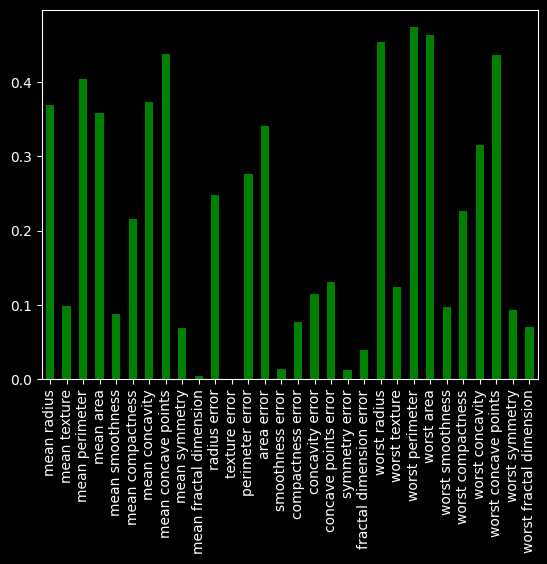

In [11]:
fimp.plot(kind='bar',color='green')
plt.show

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
matrix = table.corr()

In [15]:
matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

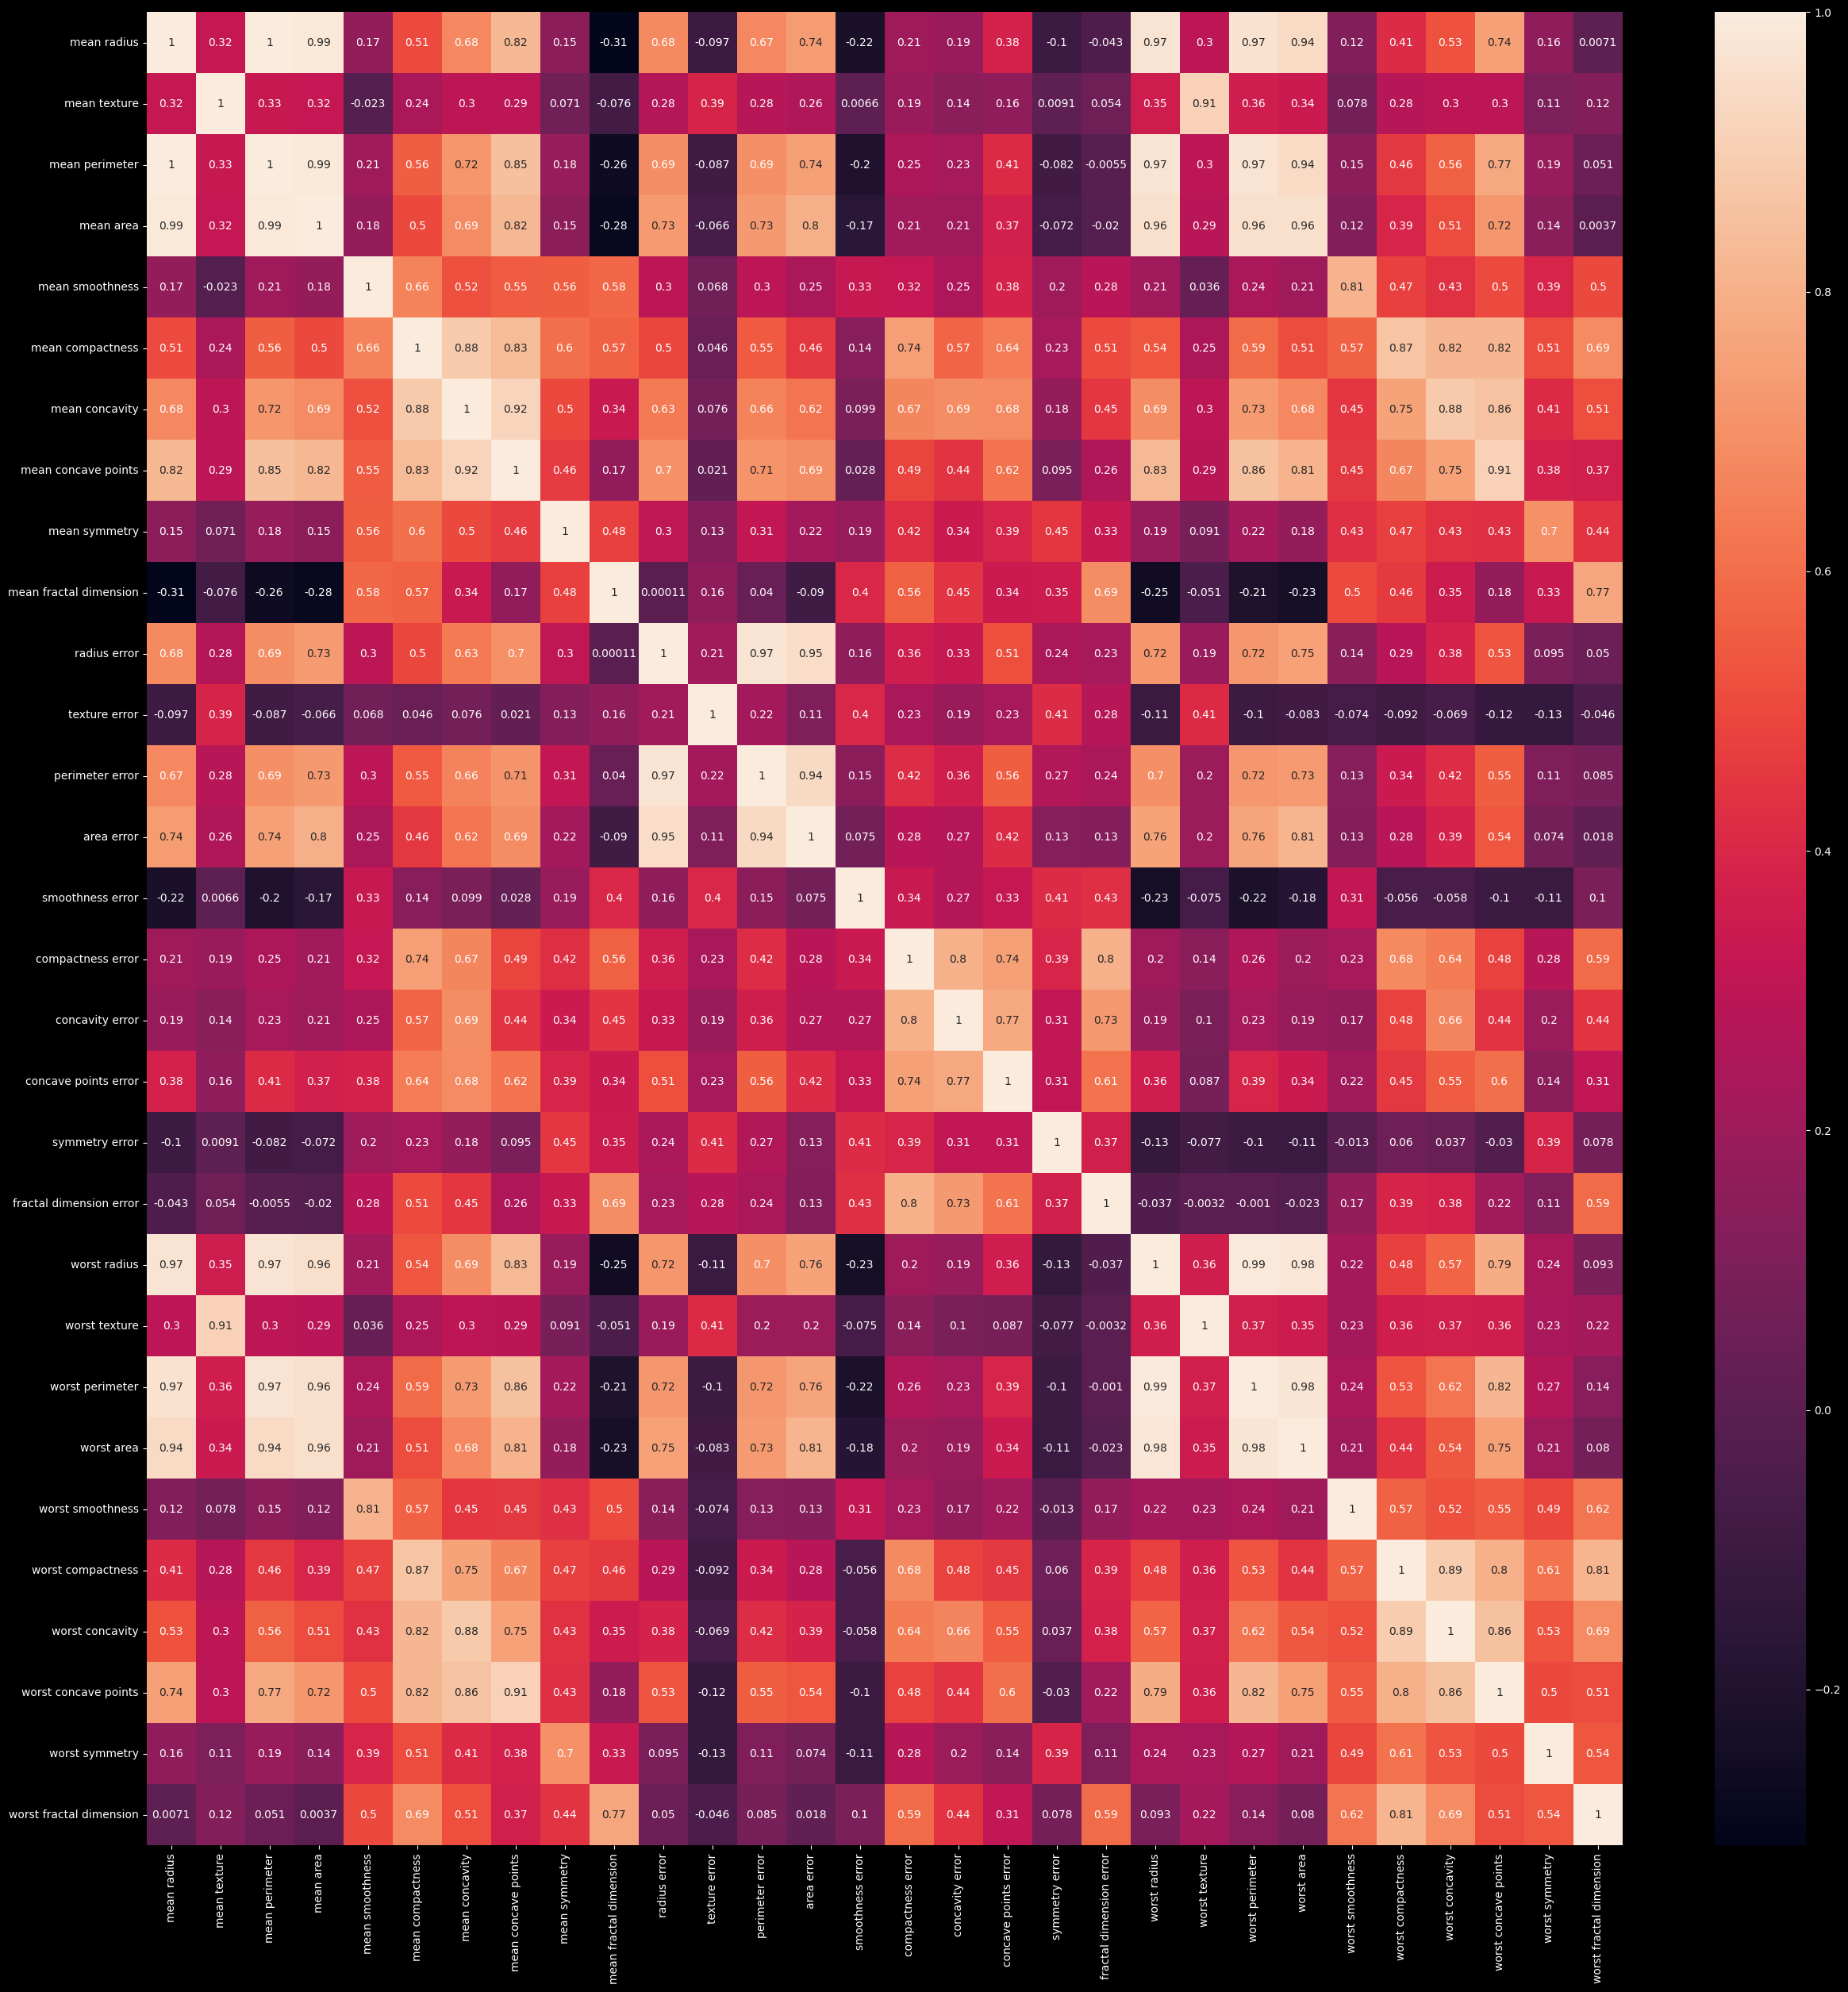

In [16]:
plt.figure(figsize = (30,30))
sns.heatmap(matrix,annot = True)

In [17]:
final = set()
for i in range(len(matrix.columns)):
        for j in range(i):
            if matrix.iloc[i, j] > 0.9: 
                col_name = matrix.columns[i]  
                final.add(col_name)

In [18]:
final

{'area error',
 'mean area',
 'mean concave points',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst concave points',
 'worst perimeter',
 'worst radius',
 'worst texture'}

In [19]:
x1 = [3,5,6,7,3,4,8,9,5,1]      # High Variance:These help the model distinguish between different classes
x2 = [1,1,1,1,1,1,1,1,1,1]      # Low Variance: If a feature is a constant (e.g., everyone in the dataset is the same age), that feature is useless for prediction because it doesn't help differentiate between targets.

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
sel = VarianceThreshold(threshold=0.5)      # drop any feature where the variance is less than 0.5
sel.fit_transform(data.data)

array([[  17.99,   10.38,  122.8 , ...,   17.33,  184.6 , 2019.  ],
       [  20.57,   17.77,  132.9 , ...,   23.41,  158.8 , 1956.  ],
       [  19.69,   21.25,  130.  , ...,   25.53,  152.5 , 1709.  ],
       ...,
       [  16.6 ,   28.08,  108.3 , ...,   34.12,  126.7 , 1124.  ],
       [  20.6 ,   29.33,  140.1 , ...,   39.42,  184.6 , 1821.  ],
       [   7.76,   24.54,   47.92, ...,   30.37,   59.16,  268.6 ]],
      shape=(569, 10))

In [23]:
sel.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [24]:
sel.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x12', 'x13', 'x20', 'x21', 'x22', 'x23'],
      dtype=object)